In [1]:
import math
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
datos_2015 = pd.read_csv('Marginacion_2015.csv')

In [4]:
datos_2015.head()

,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O
0,1,Aguascalientes,1312544,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60,-0.89,Bajo,28,2015
1,2,Baja California,3315766,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85,-1.10,Muy bajo,30,2015
2,3,Baja California Sur,712029,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37,-0.60,Bajo,22,2015
3,4,Campeche,899931,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69,0.46,Alto,10,2015
4,5,Coahuila de Zaragoza,2954915,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94,-1.10,Muy bajo,29,2015


In [5]:
variables = datos_2015[['ANALF', 'SPRIM', 'OVSDE', 'OVSEE', 
                        'OVSAE', 'VHAC', 'OVPT', 'PL.5000','PO2SM']]
variables

,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM
0,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60
1,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85
2,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37
3,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69
4,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94
5,3.90,15.24,0.38,0.38,0.96,25.65,2.45,14.47,31.18
6,14.98,31.71,2.90,2.49,13.45,44.46,11.78,57.86,62.46
7,2.67,12.65,1.40,1.81,2.39,22.16,1.76,17.05,34.77
8,1.49,6.62,0.04,0.04,1.10,19.19,0.47,0.67,28.26
9,3.17,14.50,3.68,2.63,3.26,24.58,4.33,36.19,39.16


In [6]:
X_scaled = StandardScaler().fit_transform(variables)

var_cov = np.cov(X_scaled.T)
pd.DataFrame(var_cov)

,0,1,2,3,4,5,6,7,8
0,1.032258,0.984352,0.566318,0.644919,0.851142,0.827696,0.918771,0.817096,0.840789
1,0.984352,1.032258,0.545993,0.644721,0.790763,0.769895,0.855742,0.834624,0.850514
2,0.566318,0.545993,1.032258,0.479088,0.385603,0.567678,0.483757,0.449856,0.499052
3,0.644919,0.644721,0.479088,1.032258,0.668808,0.520709,0.752481,0.576100,0.542252
4,0.851142,0.790763,0.385603,0.668808,1.032258,0.681473,0.910443,0.721711,0.626011
5,0.827696,0.769895,0.567678,0.520709,0.681473,1.032258,0.742381,0.582337,0.711288
6,0.918771,0.855742,0.483757,0.752481,0.910443,0.742381,1.032258,0.684937,0.679909
7,0.817096,0.834624,0.449856,0.576100,0.721711,0.582337,0.684937,1.032258,0.787589
8,0.840789,0.850514,0.499052,0.542252,0.626011,0.711288,0.679909,0.787589,1.032258


In [7]:
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >=0:
        return 1
    else:
        return -1

def compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2):
    """
    Helper function for computing entries of Jacobi rotation.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        c (float): value of cos of theta for Jacobi rotation matrix.
        s (float): value of sin of theta for Jacobi rotation matrix.
    """
    if np.abs(Ak[idx1,idx2]) >= np.finfo(float).eps:
        tau = (Ak[idx2, idx2] - Ak[idx1, idx1])/(2*Ak[idx1, idx2])
        t_star = sign(tau)/(np.abs(tau) + np.sqrt(1+tau**2))
        c = 1/np.sqrt(1+t_star**2)
        s = c*t_star
    else: #no rotation is performed
        c = 1
        s = 0
    return (c,s)
def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

def off(A):
    """
    Frobenius norm without the main diagonal
    Args:
        Ak (numpy ndarray): Matrix for getting the Frobenius norm.
    Returns:
        s: The Frobenius norm without the sum of the main diagonal indices.
    """
    s = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if j != i:
                s1 = math.sqrt(A[i,j]**2)
                s = s + s1
    return s

def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

def compute_Jacobi_iterative(A, sweeps, tol):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    Ak = A.copy()
    for n in range(sweeps):
        for i in range(Ak.shape[0]):
            j = i + 1
            for m in range(Ak.shape[0]-i-1):
                if off(Ak) > tol*np.linalg.norm(Ak):
                    J = compute_Jacobi_rotation(Ak, i, j)
                    Ak = J.T@Ak@J
                    j += 1
                    
    return Ak

In [8]:
eg_val = compute_Jacobi_iterative(var_cov, 4,10**(-8))

In [9]:
a = []
for i in range(0,9):
    a.append(pd.DataFrame(eg_val).loc[i,i].round(4))
    
eig = sorted(a, reverse=True)
eig

[6.6282, 0.7565, 0.6488, 0.4816, 0.3139, 0.1978, 0.1531, 0.0797, 0.0307]

In [10]:
values, vectors = np.linalg.eig(var_cov)
sorted(values.round(4), reverse=True)

[6.6282, 0.7565, 0.6488, 0.4816, 0.3139, 0.1978, 0.1531, 0.0797, 0.0307]

In [11]:
values

array([6.628, 0.756, 0.649, 0.482, 0.314, 0.031, 0.198, 0.153, 0.08 ])

In [12]:
projected_1 = vectors[0]@X_scaled.T
projected_2 = vectors[1]@X_scaled.T
projected_3 = vectors[2]@X_scaled.T
projected_4 = vectors[3]@X_scaled.T
projected_5 = vectors[4]@X_scaled.T
projected_6 = vectors[6]@X_scaled.T
projected_7 = vectors[7]@X_scaled.T
projected_8 = vectors[8]@X_scaled.T
projected_9 = vectors[5]@X_scaled.T


res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['PC3'] = projected_3
res['PC4'] = projected_4
res['PC5'] = projected_5
res['PC6'] = projected_6
res['PC7'] = projected_7
res['PC8'] = projected_8
res['PC9'] = projected_9
res['GM'] = datos_2015['GM']
res['IM'] = datos_2015['IM']

res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,GM,IM
0,0.649647,-0.721177,-1.599334,-0.221181,-0.268558,-1.038656,-0.368006,-0.236803,1.013022,Bajo,-0.89
1,0.758854,0.376193,-1.782000,-0.308528,-0.094252,-1.810786,-0.301592,-0.969247,0.638997,Muy bajo,-1.10
2,0.501116,0.870141,-1.020871,-0.605419,0.238292,-1.456315,-0.040376,-0.798485,-0.624433,Bajo,-0.60
3,-1.285308,0.541940,0.704477,0.423987,0.096259,0.628127,0.558311,-0.136045,-0.166423,Alto,0.46
4,0.603808,0.063853,-1.995784,-0.220028,-0.219518,-1.391804,-0.329079,-0.908982,0.918888,Muy bajo,-1.10
5,0.573169,0.369526,-1.061644,-0.222154,-0.633946,-0.992530,-0.447378,-0.273709,1.040047,Bajo,-0.73
6,-1.088259,1.092648,4.129409,-0.581825,0.043559,3.462110,1.244019,2.230549,-1.617439,Muy alto,2.41
7,0.570811,-0.335683,-1.151854,0.522823,-0.783220,-1.249945,0.555566,-0.314479,-0.364315,Bajo,-0.60
8,1.388610,0.032063,-2.691333,-0.280904,-0.510670,-1.545078,-0.313820,-1.355204,1.090103,Muy bajo,-1.45
9,-0.060424,-0.763390,-0.293485,1.116743,-0.484460,-0.576228,0.415240,0.416143,-1.539500,Medio,0.05


In [13]:
explained_variances = []
for i in range (len(eig)):
    explained_variances.append(eig[i]/np.sum(eig))
    
print(explained_variances)

[0.7134538174224728, 0.08142901736219497, 0.06983628085207153, 0.05183901488649451, 0.033787929345661605, 0.021291023971238818, 0.01647955394336028, 0.008578840295792384, 0.003304521920713002]


/Users/anatorres/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC1', ylabel='PC3'>

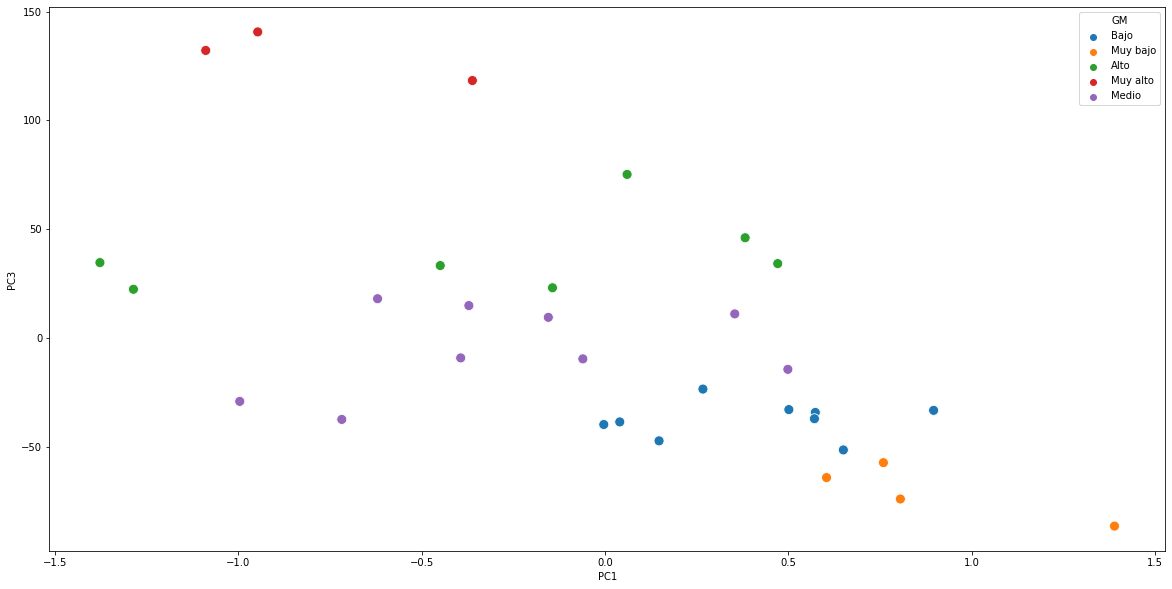

In [14]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC3'] * len(res), hue=res['GM'], s=100)

Para ese año el primer y tercer compoente principal son los que mejos agrupan las observaciones por grado de marginación

In [16]:
res.to_csv('PCA_2015.csv', index = False)